In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [97]:
# data = 'https://raw.githubusercontent.com/bruno-lima98/ml-zoomcamp-homework/refs/heads/main/01-classes/02-regression/housing_data.csv'
# !wget $data
df = pd.read_csv('housing_data.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [98]:
str_col = list(df.dtypes[df.dtypes=='object'].index)

for i in str_col:
    df[i] = df[i].str.lower().str.replace('-','_')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi_furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [99]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [100]:
for i in str_col:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())

mainroad
['yes' 'no']
2
guestroom
['no' 'yes']
2
basement
['no' 'yes']
2
hotwaterheating
['no' 'yes']
2
airconditioning
['yes' 'no']
2
prefarea
['yes' 'no']
2
furnishingstatus
['furnished' 'semi_furnished' 'unfurnished']
3


<Axes: xlabel='price', ylabel='Count'>

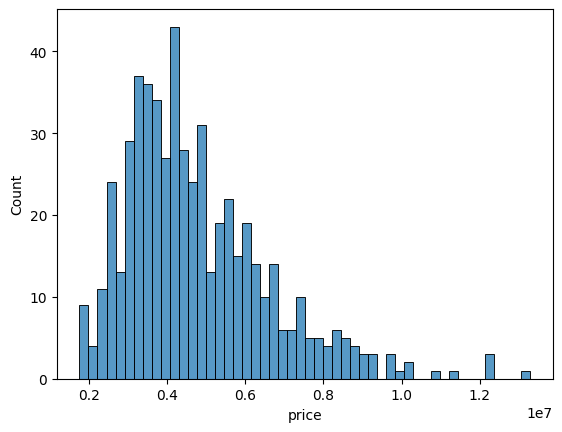

In [101]:
sns.histplot(df['price'],bins=50)

<Axes: xlabel='price', ylabel='Count'>

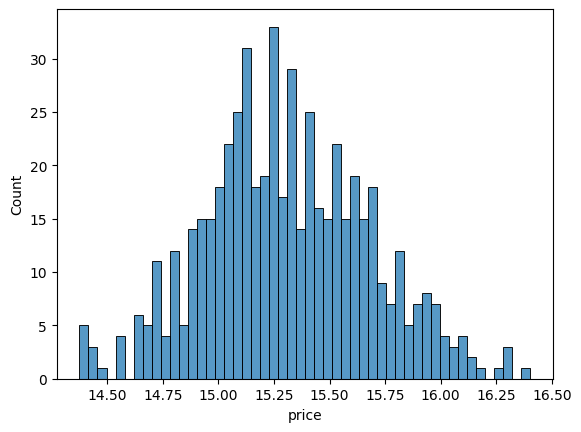

In [102]:
sns.histplot(np.log1p(df['price']),bins=50)

### Validation FW

In [103]:
cat_bin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[cat_bin] = df[cat_bin].replace({'yes':1, 'no':0})


/tmp/ipykernel_2184/1627065206.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_bin] = df[cat_bin].replace({'yes':1, 'no':0})


In [104]:
n = len(df)
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val

n, n_train, n_val, n_test, n_train + n_val + n_test

(545, 327, 109, 109, 545)

In [105]:
ipx = np.arange(n)
np.random.seed(10)
np.random.shuffle(ipx)

In [106]:
df_train = df.iloc[ipx[:n_train]]
df_val = df.iloc[ipx[n_train:n_train+n_val]]
df_test = df.iloc[ipx[n_train+n_val:]]

len(df) ,len(df_train), len(df_val), len(df_test), len(df_train) + len(df_val) + len(df_test)

(545, 327, 109, 109, 545)

In [107]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [108]:
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

In [109]:
del df_train['price']
del df_val['price']
del df_test['price']

### Linear Regression

In [110]:
def prepare_X(df):
    X = df[base].fillna(0).values

    return X

In [111]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [112]:
def rmse(y,y_pred):
    error = np.sqrt(((y_pred - y)**2).mean())
    return (f'{(error*100).round(4)} %')

In [113]:
base = ['area']
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [114]:
y_pred_train = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

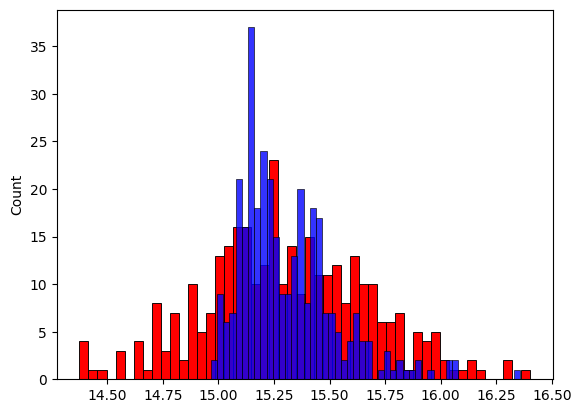

In [115]:
sns.histplot(y_train,bins=50,alpha=1,color='red')
sns.histplot(y_pred_train,bins=50,alpha=0.8,color='blue')

In [116]:
rmse(y_train,y_pred_train)

'30.2412 %'

### Categorical Variables

In [117]:
def prepare_X_cat(df):
    df = df.copy()
    features = base.copy()

    for c, values in categories.items():
        for i in values:
            df['%s_%s' % (c,i)] = (df[c] == i).astype('int')
            features.append('%s_%s' % (c,i))

    features.extend(cat_bin)

    X = df[features].fillna(0).values

    return X

In [118]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [119]:
cat_bin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']


In [120]:
cat_features = ['bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']

categories = {}

for i in cat_features:
    categories[i] = list(df[i].value_counts().index)

categories

{'bedrooms': [3, 2, 4, 5, 6, 1],
 'bathrooms': [1, 2, 3, 4],
 'stories': [2, 1, 4, 3],
 'parking': [0, 1, 2, 3],
 'furnishingstatus': ['semi_furnished', 'unfurnished', 'furnished']}

In [121]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi_furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [122]:
X_train = prepare_X_cat(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.01)
y_pred_train = w0 + X_train.dot(w)

In [123]:
par = []
for i in range (10):
    par.append(100/(10**i))

for i in par:
    X_train = prepare_X_cat(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r=i)
    y_pred_train = w0 + X_train.dot(w)

    X_val = prepare_X_cat(df_val)
    y_pred_val = w0 + X_val.dot(w)
    X_test = prepare_X_cat(df_test)
    y_pred_test = w0 + X_test.dot(w)

    score_val = rmse(y_val,y_pred_val)
    score_test = rmse(y_test,y_pred_test)

    print(f'Parâmetro r = {i:>6} | RMSE_Val = {score_val:>10} | RMSE_Test = {score_test:>10} | w0 = {w0.round(4)}')

# r = 0.0001 

Parâmetro r =  100.0 | RMSE_Val = 215.9596 % | RMSE_Test = 226.8625 % | w0 = 2.6148
Parâmetro r =   10.0 | RMSE_Val =  61.1917 % | RMSE_Test =  81.3574 % | w0 = 4.9621
Parâmetro r =    1.0 | RMSE_Val =  23.8962 % | RMSE_Test =  34.1845 % | w0 = 6.2403
Parâmetro r =    0.1 | RMSE_Val =  22.2585 % | RMSE_Test =  30.1992 % | w0 = 6.5811
Parâmetro r =   0.01 | RMSE_Val =  22.2743 % | RMSE_Test =  30.0693 % | w0 = 6.6291


Parâmetro r =  0.001 | RMSE_Val =  22.2784 % | RMSE_Test =  30.0613 % | w0 = 6.6342
Parâmetro r = 0.0001 | RMSE_Val =  22.2788 % | RMSE_Test =  30.0615 % | w0 = 6.6349
Parâmetro r =  1e-05 | RMSE_Val =  22.2789 % | RMSE_Test =  30.0163 % | w0 = 6.6351
Parâmetro r =  1e-06 | RMSE_Val =  22.2789 % | RMSE_Test =  21.7171 % | w0 = 6.0709
Parâmetro r =  1e-07 | RMSE_Val =  22.2789 % | RMSE_Test = 4022.5644 % | w0 = -69.8557


In [124]:
y_pred_val

array([15.54026175, 15.4511711 , 15.57321075, 15.27051357, 15.11231132,
       15.18564906, 15.45378997, 15.48279174, 15.77340194, 15.14535199,
       15.65990571, 15.43274124, 15.20814521, 14.99464621, 15.78138748,
       15.04762857, 15.21583438, 15.2304878 , 15.22321827, 15.20703471,
       15.38587698, 15.58800486, 15.48752637, 15.89292565, 15.43150522,
       15.59055924, 14.92007194, 14.97836071, 14.95385701, 15.70315   ,
       14.9291379 , 15.829062  , 15.74563628, 15.28856528, 15.14539915,
       14.96678233, 15.39534407, 14.93208965, 14.94396937, 15.43721821,
       15.45164608, 14.83848578, 15.78289455, 15.020386  , 15.24535832,
       15.4087643 , 15.3605608 , 15.43880034, 15.08552625, 15.14919147,
       14.86576756, 14.89008657, 15.27013122, 14.97217656, 15.81601014,
       15.57467006, 15.61310872, 15.12008789, 15.25934   , 15.82976305,
       15.22472272, 15.07232695, 15.35037185, 14.94927855, 15.07062712,
       15.20651364, 15.4610182 , 15.95796186, 15.32855574, 15.69

<Axes: ylabel='Count'>

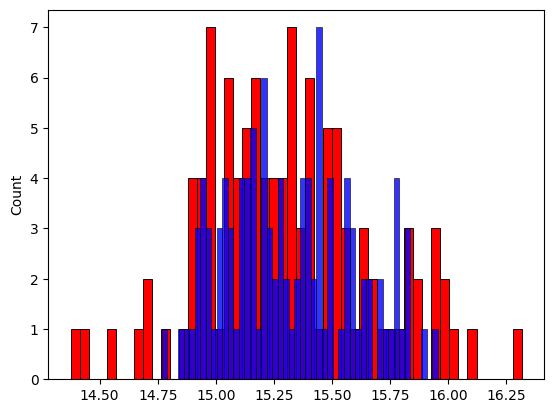

In [134]:
sns.histplot(y_val,bins=50,alpha=1,color='red')
sns.histplot(y_pred_val,bins=50,alpha=0.8,color='blue')

<Axes: ylabel='Count'>

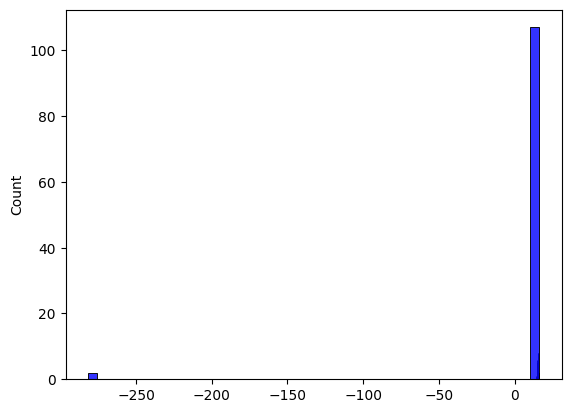

In [126]:
sns.histplot(y_test,bins=50,alpha=1,color='red')
sns.histplot(y_pred_test,bins=50,alpha=0.8,color='blue')

### Using the Model

In [127]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concat([y_train, y_val])

In [128]:
X_full_train = prepare_X_cat(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.0001)
y_pred_full_train = w0 + X_full_train.dot(w)

In [129]:
X_test = prepare_X_cat(df_test)
y_pred_test = w0 + X_test.dot(w)

score_test = rmse(y_test,y_pred_test)
score_test

'29.597 %'

In [130]:
house = df_test.iloc[50].to_dict()

In [131]:
df_small = pd.DataFrame([house])
X_small = prepare_X_cat(df_small)
y_pred_small = w0 + X_small.dot(w)
np.expm1(y_pred_small[0])

np.float64(4602242.009967822)

In [132]:
np.expm1(y_test[50])

np.float64(5599999.999999999)

Text(0, 0.5, 'Preço Previsto (R$)')

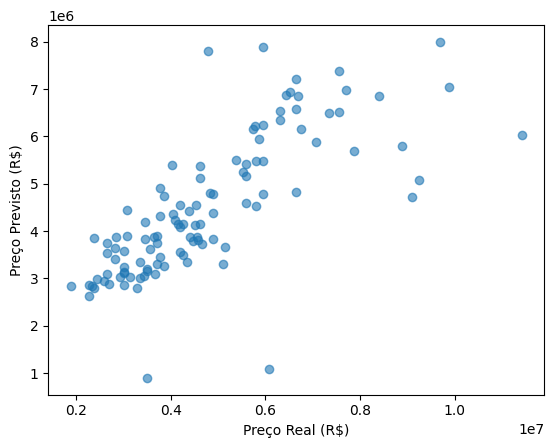

In [151]:
plt.scatter(np.expm1(y_test),np.expm1(y_pred_test),alpha=0.6)
plt.xlabel("Preço Real (R$)")
plt.ylabel("Preço Previsto (R$)")


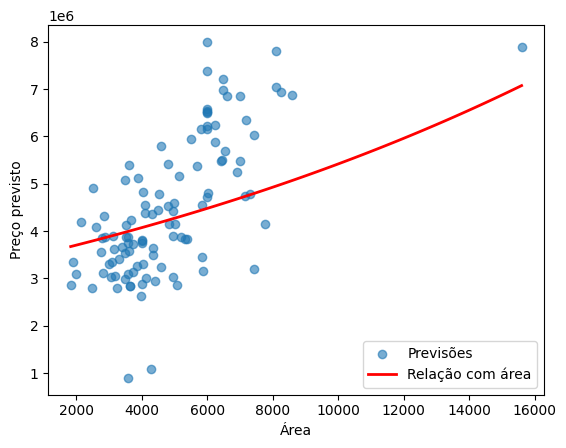

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo:
# - X_test é um array NumPy (shape: [n_amostras, n_features])
# - df_test['area'] é a coluna com a área original
# - w0 é o intercepto
# - w é o vetor de coeficientes
# - y_pred_test já foi calculado

# índice da coluna 'area' no X_test
idx_area = 0   # <- ajuste se 'area' não for a primeira coluna

# valores de área para desenhar a curva
x_sorted = np.linspace(df_test['area'].min(), df_test['area'].max(), 100)

# médias das features
means = X_test.mean(axis=0)

# cria matriz repetida (todas as linhas iguais às médias)
X_line = np.tile(means, (len(x_sorted), 1))

# substitui a coluna 'area' pelos valores variando
X_line[:, idx_area] = x_sorted

# calcula previsões da reta
y_line = w0 + X_line.dot(w)
y_line = np.expm1(y_line)

# scatter dos pontos reais previstos
plt.scatter(df_test['area'], np.expm1(y_pred_test), alpha=0.6, label="Previsões")

# plota a curva em função da área
plt.plot(x_sorted, y_line, color="red", linewidth=2, label="Relação com área")

plt.xlabel("Área")
plt.ylabel("Preço previsto")
plt.legend()
plt.show()
